In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Get homography from key frames to rink

In [3]:
#class to select keypoints in image
class KeyPointSelector:
    points = []
    def __init__(self, img, name):
        self.points = []
        self.img = img
        self.name = name

    def select_key_points(self):
        cv2.imshow(self.name, self.img)
        cv2.setMouseCallback(self.name, self.select_point)
        cv2.waitKey(0)
        self.plot_image()

    def plot_image(self):
        image = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.title(self.name)
        plt.imshow(image)

    def select_point(self, event, x, y, flags, params):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.points.append((x,y))
            cv2.circle(self.img, (x,y), 5, (0,0,0), cv2.FILLED)
            cv2.putText(self.img, str(len(self.points)), (x+5,y+5), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2)

In [4]:
def get_key_points(path, name):
    key_frame = cv2.imread(path)
    key_frame_points = KeyPointSelector(key_frame, name)
    key_frame_points.select_key_points()

    return np.array(key_frame_points.points)

def get_homography(src_points, dst_points, name):
    M, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)
    np.save(f"./{name.split('.')[0]}.npy", M)
    return M

key_frame_2.jpg


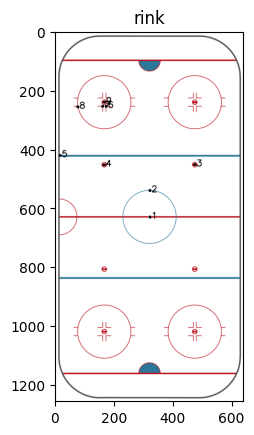

In [ ]:
path = './key_frames/'
files = os.listdir(path)
for file in [files[1]]:
    print(file)

    key_frame_points = get_key_points(path+file, file)
    geo_model_points = get_key_points('../geometric_model/rink.png', 'rink')

    M = get_homography(key_frame_points, geo_model_points, file)

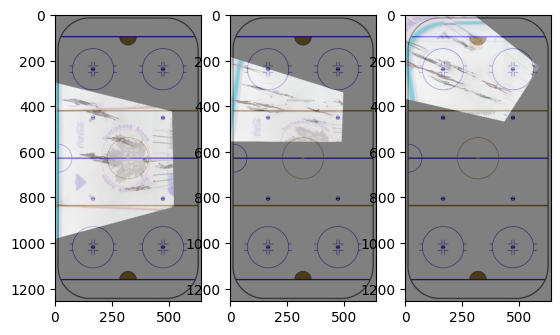

In [ ]:
path = './key_frames/'
files = os.listdir(path)

results = []
dst = cv2.imread('../geometric_model/rink.png')
for file in files:
    M = np.load(f'{file.split('.')[0]}.npy')
    img = cv2.imread(f'./key_frames/{file}')
    result = cv2.warpPerspective(img, M, (dst.shape[1], dst.shape[0]))
    results.append(result)

fig, axes = plt.subplots(1, 3)
for i in range(len(files)):
    axes[i].imshow(dst)
    axes[i].imshow(results[i], alpha = 0.5)

In [8]:
cv2.imshow('test', result)

# Get homography from first frame to first key frame

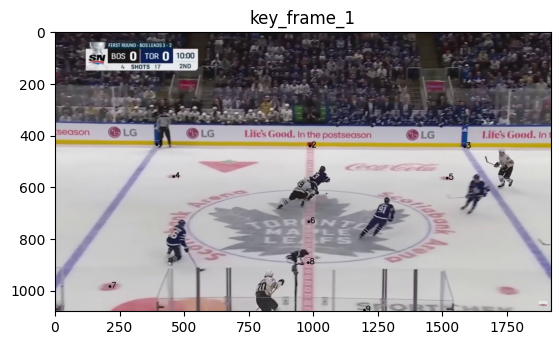

In [ ]:
key_frame_points = get_key_points('../../outputs/raw_frames/frame_0000.jpg', 'first_frame')
geo_model_points = get_key_points(f'./key_frames/key_frame_1.jpg', 'key_frame_1')
M = get_homography(key_frame_points, geo_model_points, 'first_frame')

(1080, 1920, 3)


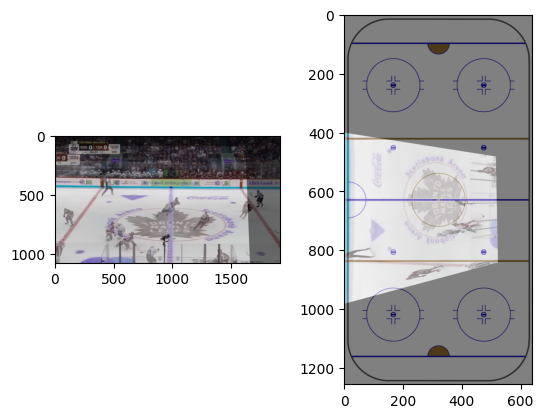

In [21]:
dst = cv2.imread('./key_frames/key_frame_1.jpg')
M = np.load('first_frame.npy')
img = cv2.imread('../../outputs/raw_frames/frame_0000.jpg')
result = cv2.warpPerspective(img, M, (dst.shape[1], dst.shape[0]))
print(dst.shape)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(dst)
axes[0].imshow(result, alpha = 0.5)

dst = cv2.imread('../geometric_model/rink.png')
M2 = np.load('key_frame_1.npy')

M3 = M2 @ M
result = cv2.warpPerspective(result, M2, (dst.shape[1], dst.shape[0]))
axes[1].imshow(dst)
axes[1].imshow(result, alpha = 0.5)

